# Hate Crime Analysis - DC

Investigate the hate crime rate of incidents involving Sexual Orientation & Gender Identity

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Examining Data

In [78]:
data = pd.read_excel('HateCrimesOpenData.xlsx')
data.head(10)

,Date of Offense,Time of Offense,Date Offense Reported,Report Year,Month,CCN,District,Block Location,Type of Hate Bias,Targeted Group,Top Offense Type
0,2012-01-08,1500-1505,2012-01-08,2012,1,12003845,3D,1600 block 17th St NW,Sexual Orientation,NaN,Threats
1,2012-01-12,1722,2012-01-12,2012,1,12005834,1D,3rd St SW and K St SW,Sexual Orientation,NaN,Robbery
2,2012-01-13,1255-1258,2012-01-13,2012,1,12006285,4D,Park Rd NW and Sherman Ave NW,Race,Unspecified,Simple Assault
3,2012-01-14,0240-0250,2012-01-14,2012,1,12006716,3D,1800 block 14th St NW,Sexual Orientation,NaN,Simple Assault
4,2012-01-14,0431-0433,2012-01-14,2012,1,12006742,3D,18th St NW and Florida Ave NW,Ethnicity/National Origin,Arab/Middle Eastern,Simple Assault
5,2012-01-22,145,2012-01-22,2012,1,12010626,7D,1300 block Alabama Ave SE,Sexual Orientation,NaN,ADW
6,2012-01-22,1930,2012-01-22,2012,1,12010912,1D,600 block H St NW,Race,Asian,Threats
7,2012-02-06,1900,2012-02-06,2012,2,12018396,3D,1300 block Park Rd NW,Sexual Orientation,NaN,Simple Assault
8,2012-02-08,1200-1230,2012-02-09,2012,2,12019568,1D,400 block 3rd St SE,Race,Black,Threats
9,2012-02-14,0900-0915,2012-02-14,2012,2,12021883,1D,1400 block Independence Ave SW,Ethnicity/National Origin,Unspecified,Simple Assault


In [79]:
data.shape

(1758, 11)

In [80]:
print(data.columns)

Index(['Date of Offense', 'Time of Offense', 'Date Offense Reported',
       'Report Year', 'Month', 'CCN', 'District', 'Block Location',
       'Type of Hate Bias', 'Targeted Group ', 'Top Offense Type'],
      dtype='object')


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1758 entries, 0 to 1757
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date of Offense        1758 non-null   datetime64[ns]
 1   Time of Offense        1758 non-null   object        
 2   Date Offense Reported  1758 non-null   datetime64[ns]
 3   Report Year            1758 non-null   int64         
 4   Month                  1758 non-null   int64         
 5   CCN                    1758 non-null   int64         
 6   District               1758 non-null   object        
 7   Block Location         1758 non-null   object        
 8   Type of Hate Bias      1758 non-null   object        
 9   Targeted Group         905 non-null    object        
 10  Top Offense Type       1754 non-null   object        
dtypes: datetime64[ns](2), int64(3), object(6)
memory usage: 151.2+ KB


In [82]:
data.isnull().sum().sort_values(ascending=False)

Targeted Group           853
Top Offense Type           4
Date of Offense            0
Time of Offense            0
Date Offense Reported      0
Report Year                0
Month                      0
CCN                        0
District                   0
Block Location             0
Type of Hate Bias          0
dtype: int64

In [83]:
data.duplicated().sum()

0

In [84]:
# Examine the Targeted Groups
data['Targeted Group '].value_counts()

Targeted Group 
Black                            239
Jewish                           163
White                            121
Latino/Hispanic                   76
Asian                             44
Hispanic                          38
Muslim                            27
Chinese                           27
Israeli                           21
Arab/Middle Eastern               17
Black/African                     17
Unspecified                       15
African                           14
Middle Eastern                    12
Mexican                           10
Ethiopian                          7
Palestinian                        6
Female                             4
Catholic                           4
Non-European                       3
ADW                                2
Unknown                            2
Russian                            2
Christian                          2
Indian                             2
Colombian                          1
Black; Jewish         

In [85]:
data['Targeted Group '].fillna('No Targeted Group', inplace=True)

In [86]:
data['Top Offense Type'].fillna('No Offense Indicated', inplace=True)

In [87]:
data['Top Offense Type'].replace('Damage/Defacing/Destruction of Property', 'Destruction of Property', inplace=True)

In [88]:
data.isnull().sum().sort_values(ascending=False)

Date of Offense          0
Time of Offense          0
Date Offense Reported    0
Report Year              0
Month                    0
CCN                      0
District                 0
Block Location           0
Type of Hate Bias        0
Targeted Group           0
Top Offense Type         0
dtype: int64

# Clean Data

Clean dataset to only show hate crimes where type is sexual orientiation and gender identity/expression and only show offenses that happened within the last 5 years (2020-2025)

In [89]:
# Count the number of incidents where 'Type of Hate Bias' = 'Sexual Orientation'
sexualOrientationCount = (data['Type of Hate Bias'] == 'Sexual Orientation').sum()
print(f"Number of incidents involving Sexual Orientation: {sexualOrientationCount}")

# Count the number of incidents where 'Type of Hate Bias' = 'Gender Identity/Expression'
genderIdentityCount = (data['Type of Hate Bias'] == 'Gender Identity/Expression').sum()
print(f"Number of incidents involving Gender Identity/Expression: {genderIdentityCount}")

totalCount = sexualOrientationCount + genderIdentityCount

print(f"Total number of incidents involving Seuxal Orientation and Gender Identity/Expression: {totalCount}")

Number of incidents involving Sexual Orientation: 550
Number of incidents involving Gender Identity/Expression: 246
Total number of incidents involving Seuxal Orientation and Gender Identity/Expression: 796


In [90]:
# Filter data for incidents involving Sexual Orientation or Gender Identity/Expression
sexGen_data = data[data['Type of Hate Bias'].isin(['Sexual Orientation', 'Gender Identity/Expression'])]

In [91]:
# Figure out the earliest and latest incident dates reported
print(f"Date of the earliest incident: ",data['Date of Offense'].min())
print(f"Date of the latest incident: ",data['Date of Offense'].max())

Date of the earliest incident:  2012-01-08 00:00:00
Date of the latest incident:  2025-06-20 00:00:00


In [92]:
# Filter data for incidents within the last 5 years (2020-2025)
current_year = pd.to_datetime('now').year
print(current_year)

start_year = current_year - 5
print(start_year)


2025
2020


In [93]:
# Filter incidents that occurred within the last 5 years
filteredIncidents = sexGen_data[(sexGen_data['Date of Offense'].dt.year >= start_year) & 
                               (sexGen_data['Date of Offense'].dt.year <= current_year)]

#Check our data
filteredIncidents.sort_values(by='Date of Offense', ascending=True)

,Date of Offense,Time of Offense,Date Offense Reported,Report Year,Month,CCN,District,Block Location,Type of Hate Bias,Targeted Group,Top Offense Type
977,2020-01-03,2320,2020-01-04,2020,1,20001974,4D,800 block Upshur St NW,Sexual Orientation,No Targeted Group,Stalking
978,2020-01-06,1050,2020-01-06,2020,1,20003221,4D,1200 block Taylor St NW,Sexual Orientation,No Targeted Group,Simple Assault
980,2020-01-12,144,2020-01-12,2020,1,20006772,2D,1400 block 14th St NW,Sexual Orientation,No Targeted Group,Simple Assault
984,2020-01-28,2341,2020-01-29,2020,1,20017231,4D,800 block Upshur St NW,Sexual Orientation,No Targeted Group,Stalking
985,2020-01-30,1534,2020-01-30,2020,1,20018329,7D,2000 block Tremont St SE,Gender Identity/Expression,No Targeted Group,Simple Assault
...,...,...,...,...,...,...,...,...,...,...,...
1750,2025-06-09,1245,2025-06-09,2025,6,25084505,5D,400 block of 20th St NE,Sexual Orientation,No Targeted Group,ADW
1752,2025-06-13,1417,2025-06-13,2025,6,25088537,3D,2000 block of Georgia Ave NW,Sexual Orientation,No Targeted Group,Simple Assault
1754,2025-06-14,2013,2025-06-14,2025,6,25089527,3D,900 block of Florida Ave NW,Sexual Orientation,No Targeted Group,Simple Assault
1755,2025-06-15,1740,2025-06-15,2025,6,25089675,5D,2000 block of C St NE,Sexual Orientation,No Targeted Group,Simple Assault


In [94]:
# Group by 'Top Offense Type'
offense_counts = sexGen_data['Top Offense Type'].value_counts()
print(offense_counts)

Top Offense Type
Simple Assault                          330
Threats                                 203
ADW                                     122
Destruction of Property                  57
Robbery                                  50
Stalking                                  7
Sexual Assault                            3
Sex Abuse                                 3
Threats to do Bodily Harm                 3
Sexual Abuse                              3
Threats to Kidnap or Injure a Person      2
Deface Private/Public Property            2
Affrays                                   1
Cruelty to Children                       1
Aggravated Assault                        1
Assault w/Significant Bodily Injury       1
No Offense Indicated                      1
Violation of CPO                          1
Leaving After Colliding                   1
Voyeurism                                 1
Theft                                     1
Other Crimes                              1
Burglary       

In [95]:
# Drop Columns: Month, CCN, District, Block Location
filteredIncidents = filteredIncidents.drop(columns=['Month', 'CCN', 'District', 'Block Location', 'Time of Offense'])

In [96]:
filteredIncidents.head(10)

,Date of Offense,Date Offense Reported,Report Year,Type of Hate Bias,Targeted Group,Top Offense Type
977,2020-01-03,2020-01-04,2020,Sexual Orientation,No Targeted Group,Stalking
978,2020-01-06,2020-01-06,2020,Sexual Orientation,No Targeted Group,Simple Assault
980,2020-01-12,2020-01-12,2020,Sexual Orientation,No Targeted Group,Simple Assault
984,2020-01-28,2020-01-29,2020,Sexual Orientation,No Targeted Group,Stalking
985,2020-01-30,2020-01-30,2020,Gender Identity/Expression,No Targeted Group,Simple Assault
986,2020-01-31,2020-01-31,2020,Sexual Orientation,No Targeted Group,Stalking
987,2020-02-01,2020-02-02,2020,Gender Identity/Expression,No Targeted Group,Simple Assault
989,2020-02-06,2020-02-06,2020,Sexual Orientation,No Targeted Group,Threats
991,2020-02-09,2020-02-09,2020,Gender Identity/Expression,No Targeted Group,Threats
993,2020-02-21,2020-02-21,2020,Sexual Orientation,No Targeted Group,ADW


In [97]:
# Reset index for filtered incidents
filteredIncidents.reset_index(drop=True, inplace=True)

In [98]:
filteredIncidents.head(10)

,Date of Offense,Date Offense Reported,Report Year,Type of Hate Bias,Targeted Group,Top Offense Type
0,2020-01-03,2020-01-04,2020,Sexual Orientation,No Targeted Group,Stalking
1,2020-01-06,2020-01-06,2020,Sexual Orientation,No Targeted Group,Simple Assault
2,2020-01-12,2020-01-12,2020,Sexual Orientation,No Targeted Group,Simple Assault
3,2020-01-28,2020-01-29,2020,Sexual Orientation,No Targeted Group,Stalking
4,2020-01-30,2020-01-30,2020,Gender Identity/Expression,No Targeted Group,Simple Assault
5,2020-01-31,2020-01-31,2020,Sexual Orientation,No Targeted Group,Stalking
6,2020-02-01,2020-02-02,2020,Gender Identity/Expression,No Targeted Group,Simple Assault
7,2020-02-06,2020-02-06,2020,Sexual Orientation,No Targeted Group,Threats
8,2020-02-09,2020-02-09,2020,Gender Identity/Expression,No Targeted Group,Threats
9,2020-02-21,2020-02-21,2020,Sexual Orientation,No Targeted Group,ADW


In [99]:
filteredIncidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date of Offense        311 non-null    datetime64[ns]
 1   Date Offense Reported  311 non-null    datetime64[ns]
 2   Report Year            311 non-null    int64         
 3   Type of Hate Bias      311 non-null    object        
 4   Targeted Group         311 non-null    object        
 5   Top Offense Type       311 non-null    object        
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.7+ KB


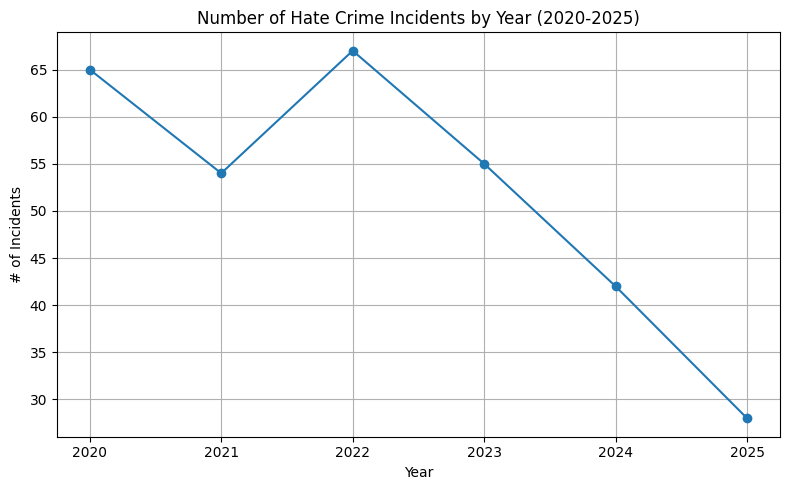

In [118]:
yearly_count = filteredIncidents.groupby('Report Year').size()
plt.figure(figsize=(8, 5))
plt.plot(yearly_count.index, yearly_count.values, marker='o')
plt.title('Number of Hate Crime Incidents by Year (2020-2025)')
plt.xlabel('Year')
plt.ylabel('# of Incidents')
plt.grid(True)
plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


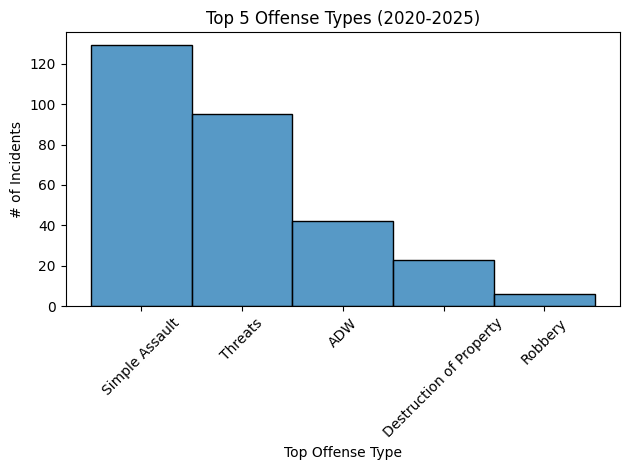

In [119]:
top5 = filteredIncidents['Top Offense Type'].value_counts().nlargest(5).index
sns.histplot(filteredIncidents[filteredIncidents['Top Offense Type'].isin(top5)]['Top Offense Type'])
plt.title('Top 5 Offense Types (2020-2025)')
plt.xlabel('Top Offense Type')
plt.ylabel('# of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

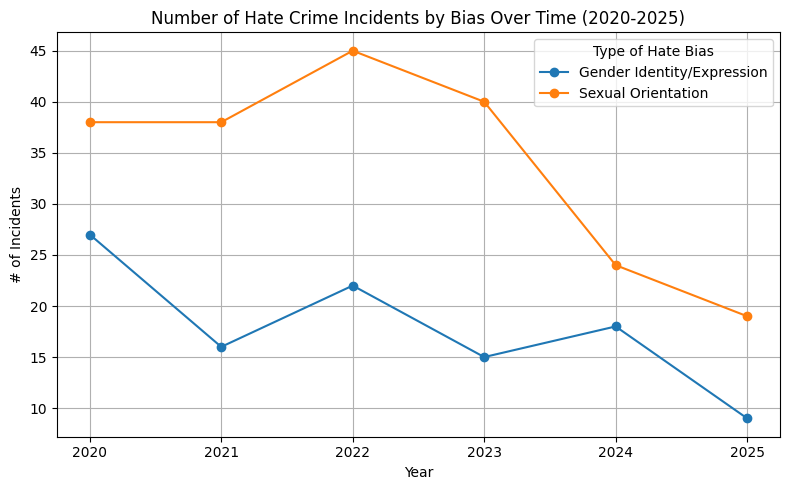

In [124]:
# Group by 'Report Year' and 'Type of Hate Bias', then count incidents
bias_year_counts = filteredIncidents.groupby(['Report Year', 'Type of Hate Bias']).size().unstack(fill_value=0)

# Plot the over time for each hate bias
bias_year_counts.plot(kind='line', marker='o', figsize=(8, 5))
plt.title('Number of Hate Crime Incidents by Bias Over Time (2020-2025)')
plt.xlabel('Year')
plt.ylabel('# of Incidents')
plt.legend(title='Type of Hate Bias')
plt.grid(True)
plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


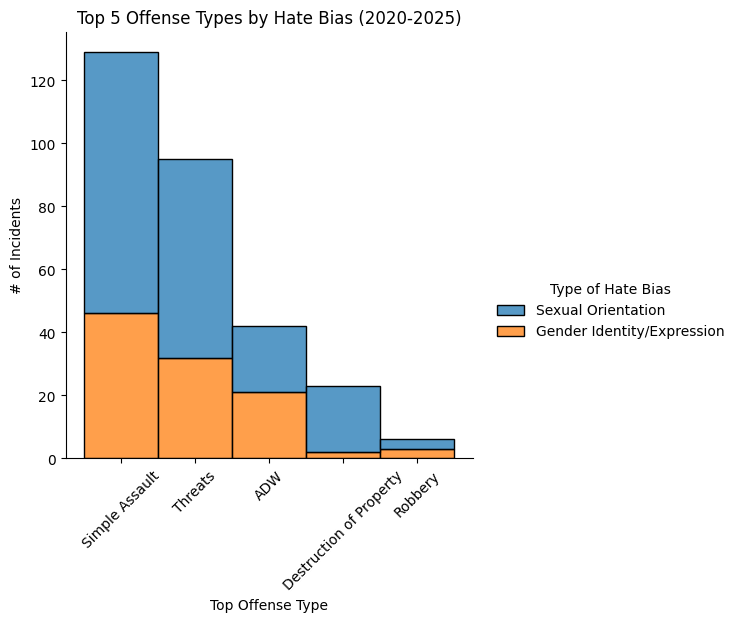

In [ ]:
# Plot the top 5 offense types by hate bias
sns.displot(data=filteredIncidents[filteredIncidents['Top Offense Type'].isin(top5)],
    x='Top Offense Type',
    hue='Type of Hate Bias',
    multiple='stack'
)
plt.title('Top 5 Offense Types by Hate Bias (2020-2025)')
plt.xlabel('Top Offense Type')
plt.ylabel('# of Incidents')
plt.xticks(rotation=45)
#plt.tight_layout()
plt.show()